In [87]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [89]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = "".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])


In [90]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# def to_one_hot(labels, dimension=46):
#   results = np.zeros((len(labels), dimension))
#   for i, label in enumerate(labels):
#     results[i, label] = 1.
#   return results

#   y_train = to_one_hot(train_labels)
#   y_test = to_one_hot(test_labels)

In [91]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [92]:
from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [93]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [97]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train=y_train[1000:]

In [98]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.3615 - loss: 3.2414 - val_accuracy: 0.6290 - val_loss: 1.8476
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6763 - loss: 1.6243 - val_accuracy: 0.6980 - val_loss: 1.3609
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7378 - loss: 1.2028 - val_accuracy: 0.7440 - val_loss: 1.1978
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7957 - loss: 0.9567 - val_accuracy: 0.7580 - val_loss: 1.0883
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8357 - loss: 0.7829 - val_accuracy: 0.7840 - val_loss: 0.9948
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8549 - loss: 0.6783 - val_accuracy: 0.7870 - val_loss: 0.9566
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8787 - loss: 0.5603 - val_accuracy: 0.8000 - val_loss: 0.8945
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9053 - loss: 0.4557 - val_accuracy: 0.8140 - 

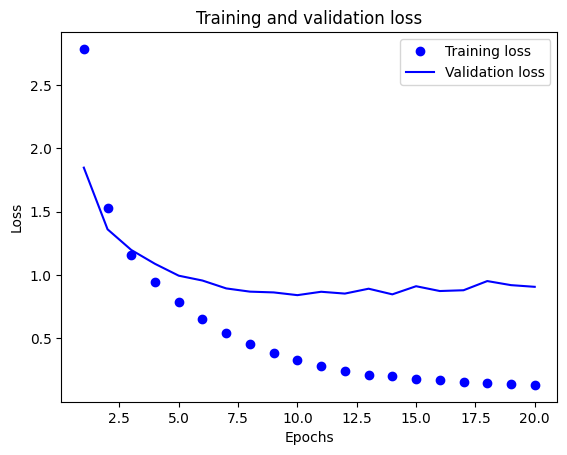

In [100]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

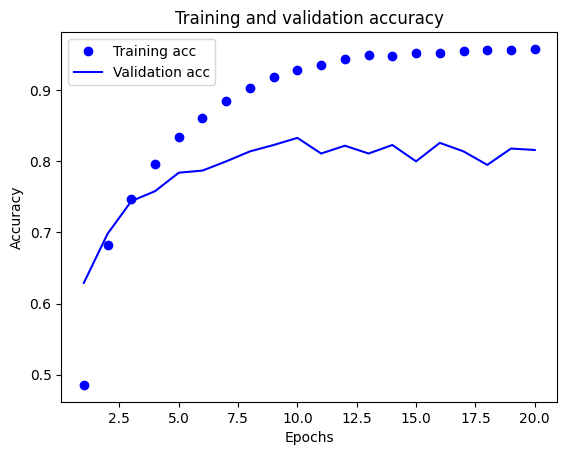

In [102]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [113]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3414 - loss: 3.4667
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6644 - loss: 1.7925
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7345 - loss: 1.2376
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7835 - loss: 0.9995
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8212 - loss: 0.8135
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8450 - loss: 0.6915
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8761 - loss: 0.5789
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8984 - loss: 0.4884
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9118 - loss: 0.4247
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.9109


In [106]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
hits_array.mean()

0.18432769367764915